## Main Objective
The goal is to **estimate the popularity of music** tracks based on their audio features.  
Predicting the popularity of music can help music streaming platforms understand user preferences, optimize playlists and enhance **recommendation systems** to improve  
user engagement and satisfaction.

### Data Understanding

|variable                 |class     |description |
|:---|:---|:-----------|
|track_id                 |character | Song unique ID|
|track_name               |character | Song Name|
|track_artist             |character | Song Artist|
|track_popularity         |double    | Song Popularity (0-100) where higher is better |
|track_album_id           |character | Album unique ID|
|track_album_name         |character | Song album name |
|track_album_release_date |character | Date when album released |
|playlist_name            |character | Name of playlist |
|playlist_id              |character | Playlist ID|
|playlist_genre           |character | Playlist genre |
|playlist_subgenre        |character | Playlist subgenre|
|danceability             |double    | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|energy                   |double    | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|key                      |double    | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
|loudness                 |double    | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|mode                     |double    | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|speechiness              |double    | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|acousticness             |double    | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|instrumentalness         |double    | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|liveness                 |double    | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|valence                  |double    | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
|tempo                    |double    | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|duration_ms              |double    | Duration of song in milliseconds |

1. Data Preprocessing

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("datasets/spotify_songs.csv")

In [3]:
dataset.head(2)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600


In [23]:
new_dataset = dataset[['danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_popularity']]

In [29]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      32833 non-null  float64
 1   energy            32833 non-null  float64
 2   loudness          32833 non-null  float64
 3   mode              32833 non-null  int64  
 4   key               32833 non-null  int64  
 5   speechiness       32833 non-null  float64
 6   acousticness      32833 non-null  float64
 7   liveness          32833 non-null  float64
 8   valence           32833 non-null  float64
 9   tempo             32833 non-null  float64
 10  duration_ms       32833 non-null  int64  
 11  track_popularity  32833 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 3.0 MB


In [24]:
new_dataset.head(2)

,danceability,energy,loudness,mode,key,speechiness,acousticness,liveness,valence,tempo,duration_ms,track_popularity
0,0.748,0.916,-2.634,1,6,0.0583,0.1020,0.0653,0.518,122.036,194754,66
1,0.726,0.815,-4.969,1,11,0.0373,0.0724,0.3570,0.693,99.972,162600,67


1.1 Checking Missing Values

In [25]:
new_dataset.isnull().sum()

danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
liveness            0
valence             0
tempo               0
duration_ms         0
track_popularity    0
dtype: int64

In [26]:
new_dataset.isna().sum()

danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
liveness            0
valence             0
tempo               0
duration_ms         0
track_popularity    0
dtype: int64

#### Exploratory Data Analysis

1. Understanding the data distribution

In [30]:
# An overview of the dataset.
new_dataset.describe()

,danceability,energy,loudness,mode,key,speechiness,acousticness,liveness,valence,tempo,duration_ms,track_popularity
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,0.654850,0.698619,-6.719499,0.565711,5.374471,0.107068,0.175334,0.190176,0.510561,120.881132,225799.811622,42.477081
std,0.145085,0.180910,2.988436,0.495671,3.611657,0.101314,0.219633,0.154317,0.233146,26.903624,59834.006182,24.984074
min,0.000000,0.000175,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,0.000000
25%,0.563000,0.581000,-8.171000,0.000000,2.000000,0.041000,0.015100,0.092700,0.331000,99.960000,187819.000000,24.000000
50%,0.672000,0.721000,-6.166000,1.000000,6.000000,0.062500,0.080400,0.127000,0.512000,121.984000,216000.000000,45.000000
75%,0.761000,0.840000,-4.645000,1.000000,9.000000,0.132000,0.255000,0.248000,0.693000,133.918000,253585.000000,62.000000
max,0.983000,1.000000,1.275000,1.000000,11.000000,0.918000,0.994000,0.996000,0.991000,239.440000,517810.000000,100.000000


**A histogram** is a chart that plots the distribution of a numeric variable’s values as a series of bars.  
Each bar typically covers a range of numeric values called a bin or class; a bar’s height indicates the frequency of data points with a value within the corresponding bin.

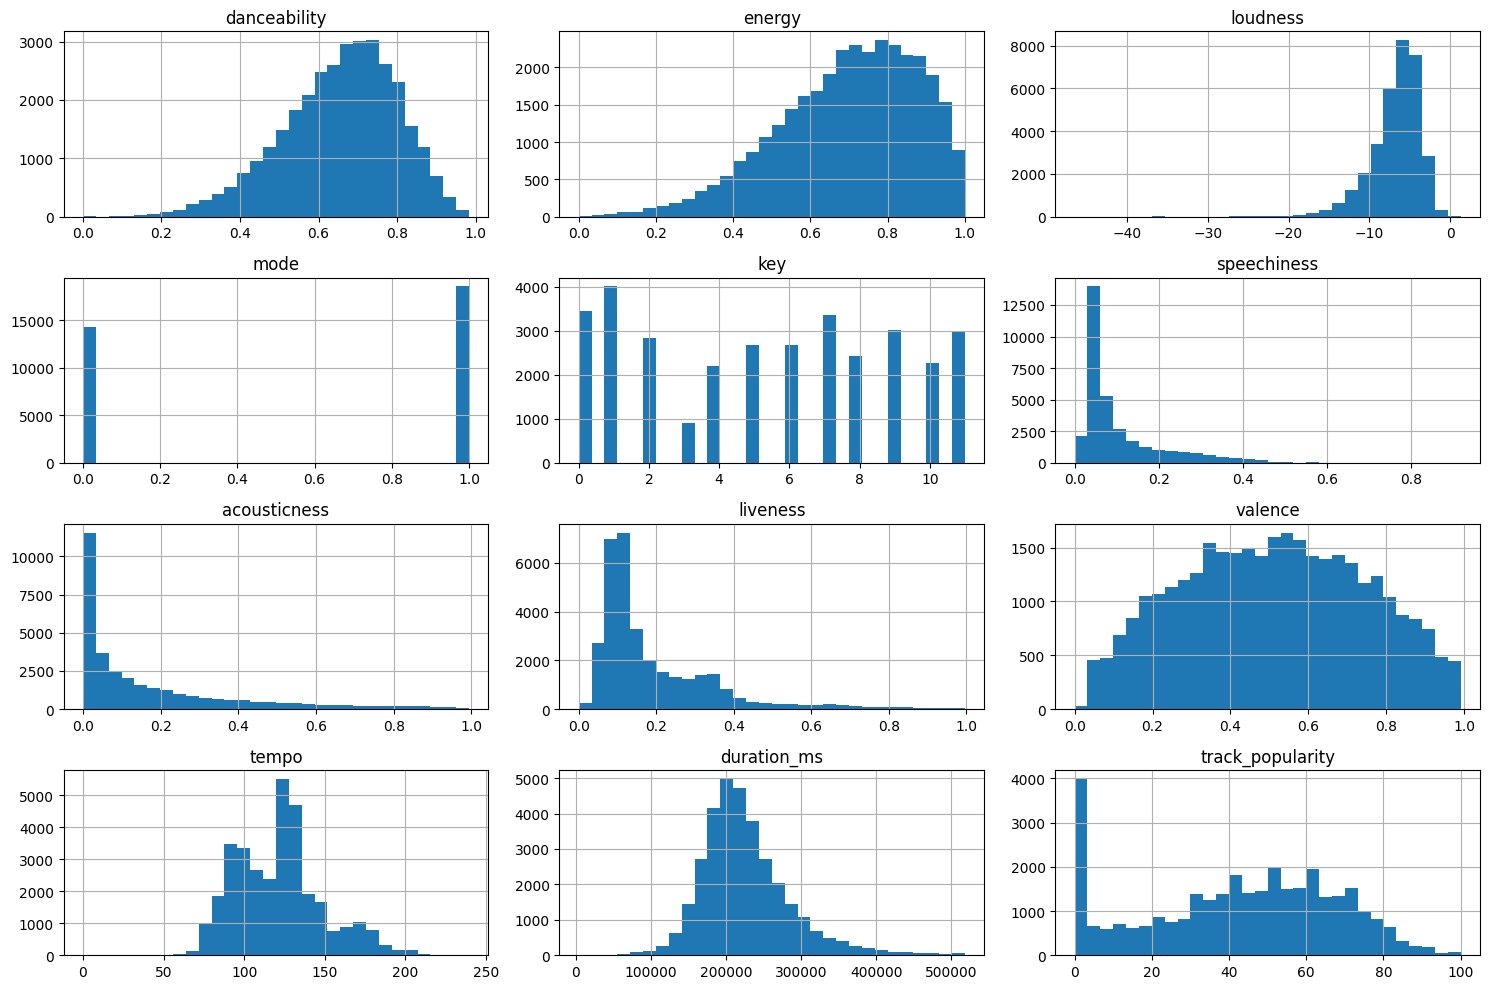

In [35]:
# Visualizing the distribution of each feature
# bins,  it defines the number of equal-width bins in the range.
new_dataset.hist(bins=30, figsize=(15,10), layout=(4,3))
plt.tight_layout()
plt.show()

1. **mode** and **key** features are categorical features, (bar chart could be more appropriate chart for visualizing it)  .
2. All other features are **continuous numeric values**.  
3. 'danceability' is almost normal distributed, is slightly left-skewed. (It indicates a balanced range of energy levels in the tracks).  
Indicates most tracks are fairly balanced in danceability, with a few tracks that are significantly less danceable.

4. 'energy' and 'loudness' are left-skewed. 'loudness' is **bimodal**.  
Indicates a majority of tracks have high energy and loudness, with fewer tracks having low energy or loudness.  
Bimodal Loudness suggests there are two distinct groups of tracks with different loudness levels, possibly live vs studio versions or different genres.  

5. 'speechiness', 'acousticness', 'liveness' are right-skewed.  
Most tracks have low values in these features, with fewer tracks having high speechiness, acousticness, or liveness. This can indicate most tracks are not predominantly speech, not highly acoustic, and not live.

6. 'tempo' is bimodal.  
Two peaks suggest there are two common tempos among the tracks. This could represent different genres or types of songs.

7. 'duration_ms' is normal distributed and slightly right-skewed.  
Most tracks have durations around the mean, with some longer tracks stretching the right side of the distribution.

8. 'valence' doesn't have a distinct peak, **uniform dataset**.  
Indicates that tracks are evenly distributed in terms of their positiveness. It doesn’t favor any particular emotion, providing a variety of moods in the tracks.

9. There are **outliers** in most of the features.

2. Relationship between features

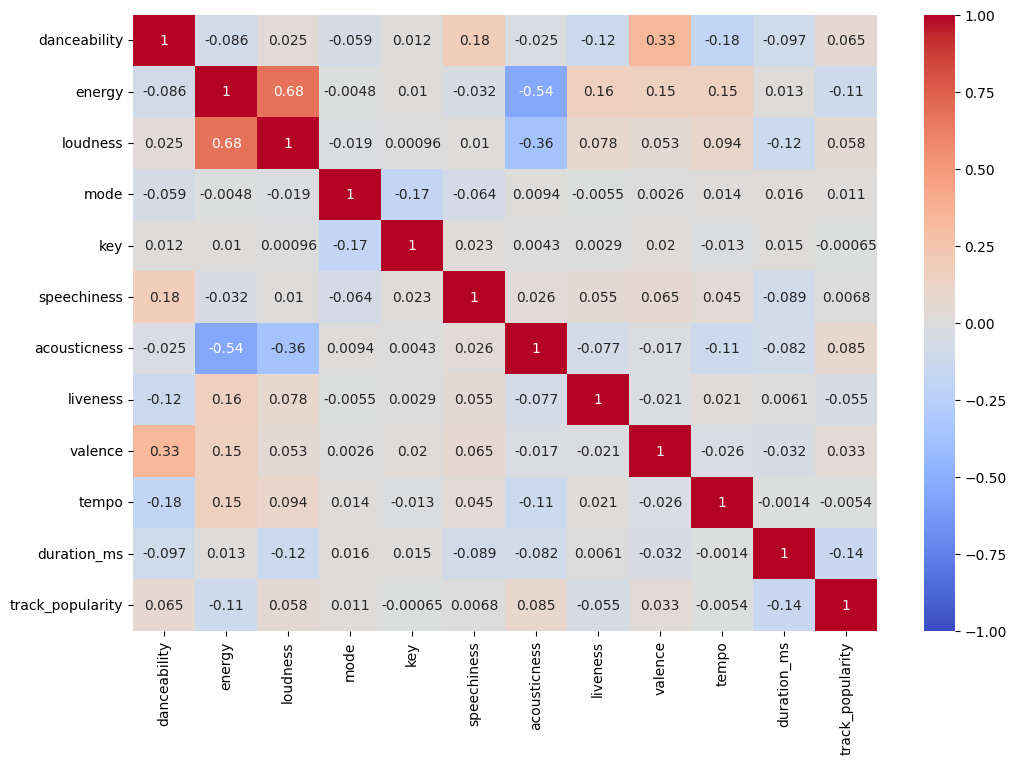

In [43]:
corr_matrix = new_dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [47]:
# Extract correlations with 'track_popularity'
track_pop_corr = corr_matrix['track_popularity']

# Top 5 most correlated features with 'track_popularity'
top_7_corr = track_pop_corr.abs().sort_values(ascending=False).head(8)[1:]  # exclude 'track_popularity' itself
print("Top 5 most correlated features with 'track_popularity':\n", top_7_corr)

# Least correlated feature with 'track_popularity'
least_corr = track_pop_corr.abs().sort_values(ascending=True).head()
print("Least correlated feature with 'track_popularity':\n", least_corr)

Top 5 most correlated features with 'track_popularity':
 duration_ms     0.143682
energy          0.109112
acousticness    0.085159
danceability    0.064748
loudness        0.057687
liveness        0.054584
valence         0.033231
Name: track_popularity, dtype: float64
Least correlated feature with 'track_popularity':
 key            0.000650
tempo          0.005378
speechiness    0.006819
mode           0.010637
valence        0.033231
Name: track_popularity, dtype: float64


**Strong correlation** indicates a relationship between features, but it doesn’t confirm **causation**.  
Just because 'energy' might correlate highly with 'track_popularity' doesn’t mean high energy causes popularity.

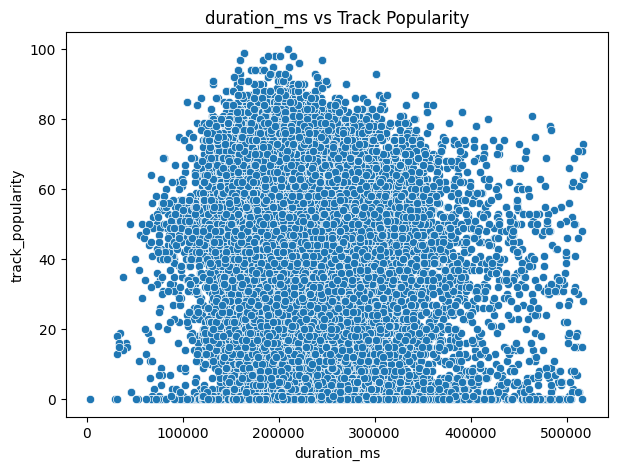

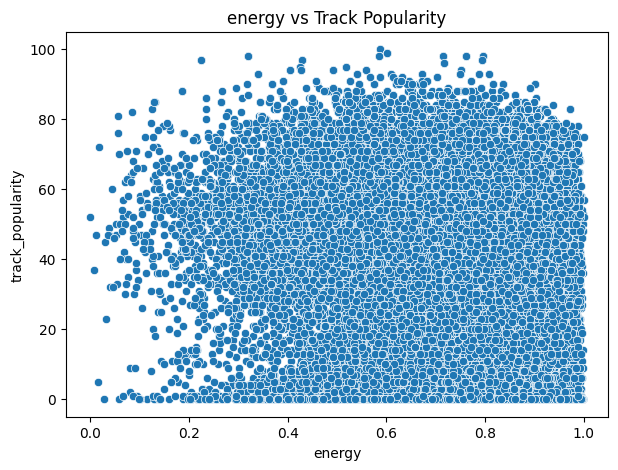

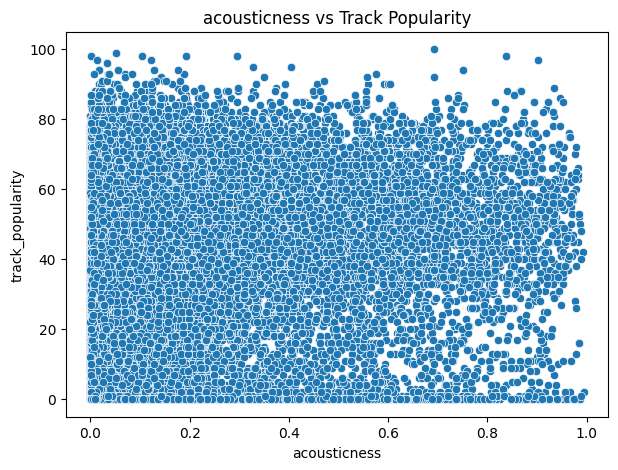

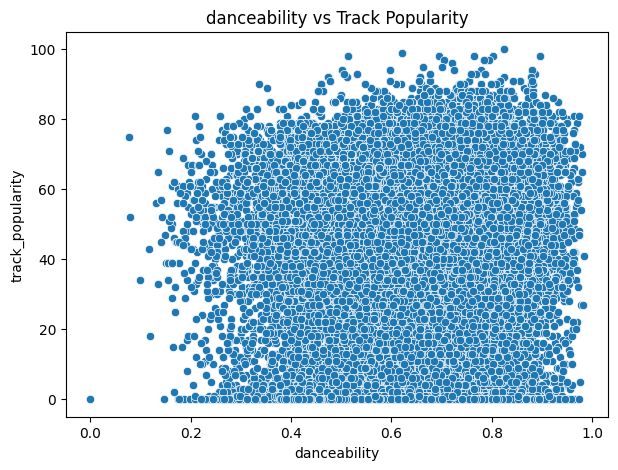

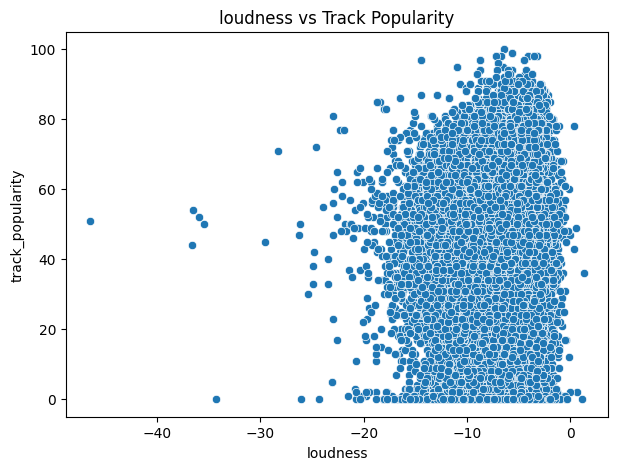

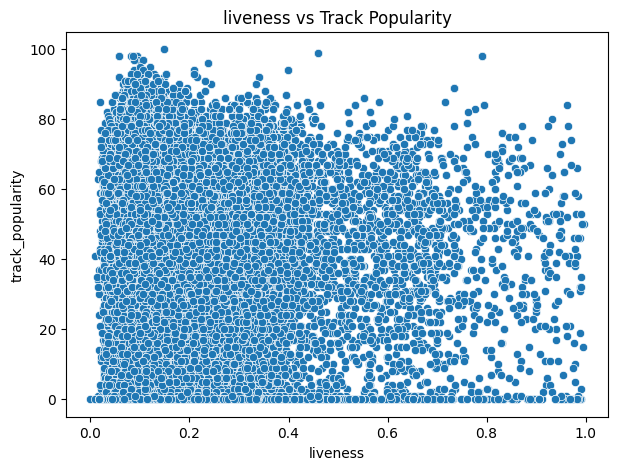

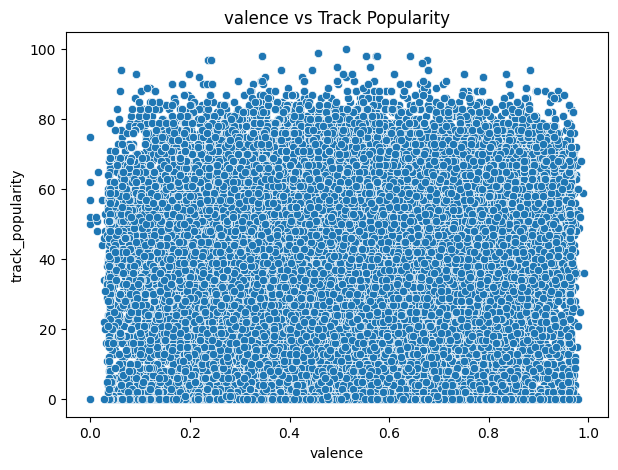

In [52]:
for feature in top_7_corr.index:  # Exclude 'track_popularity'
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=new_dataset[feature], y=new_dataset['track_popularity'])
    plt.xlabel(feature)
    plt.ylabel('track_popularity')
    plt.title(f'{feature} vs Track Popularity')
    
    

### Model Building
The next step is to train a Machine Learning model to predict the popularity of music using the features we have selected.

1. Data Preprocessing

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [60]:
features = top_7_corr.index
X = new_dataset[features]
y = new_dataset['track_popularity']

In [61]:
X.shape, y.shape

((32833, 7), (32833,))

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26266, 7), (6567, 7), (26266,), (6567,))